In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.interpolate import interp1d
from scipy import signal
%config InlineBackend.figure_format = 'retina'

In [7]:
shape = "cylinder"
shape = "prism"
shape_id = ["sphere", "prism", "cylinder"].index(shape)
filename = f"ansys/{shape}_fine_resultant_force_xyz.csv"
data = pd.read_csv(filename, header=1)
data

,Time,Ma 368 X-force,Time.1,Ma 368 Y-force,Time.2,Ma 368 Z-force,Unnamed: 6
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN
1,0.001100,0.00000,0.001100,0.000000,0.001100,0.000000,NaN
2,0.002200,0.00000,0.002200,0.000000,0.002200,0.000000,NaN
3,0.003299,0.00000,0.003299,0.000000,0.003299,0.000000,NaN
4,0.004400,0.00000,0.004400,0.000000,0.004400,0.000000,NaN
...,...,...,...,...,...,...,...
996,1.095600,-11.35830,1.095600,53.148701,1.095600,0.744777,NaN
997,1.096700,-2.43937,1.096700,58.986301,1.096700,1.624560,NaN
998,1.097800,10.99620,1.097800,55.071701,1.097800,1.033960,NaN
999,1.098900,-2.23077,1.098900,58.389400,1.098900,1.079240,NaN


In [15]:
column_mid_id = data.axes[1][3].split()[1]

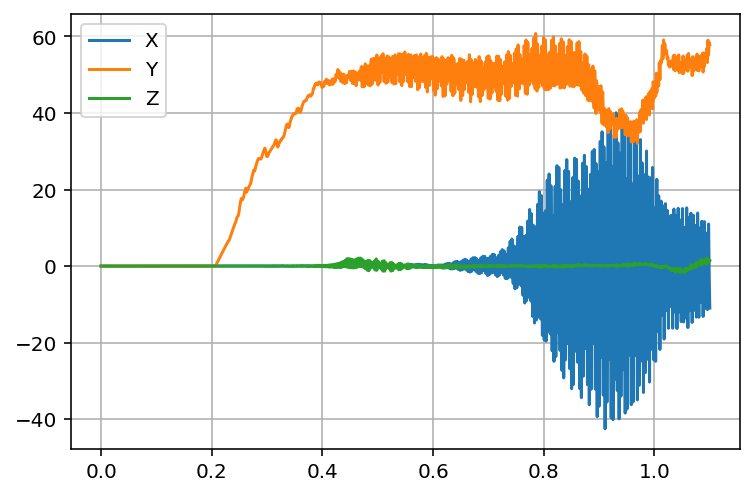

In [16]:
plt.grid()
for i,c in enumerate(["X", "Y", "Z"]):
    plt.plot(data["Time"], data[f"Ma {column_mid_id} {c}-force"], label=c)
plt.legend();

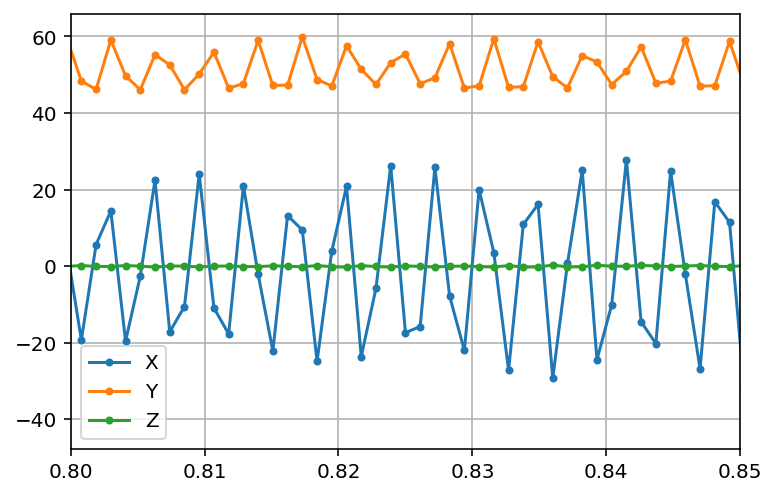

In [13]:
plt.xlim([0.8, 0.85])
plt.grid()
for i,c in enumerate(["X", "Y", "Z"]):
    plt.plot(data["Time"], data[f"Ma {column_mid_id} {c}-force"], '.-', label=c)
plt.legend();

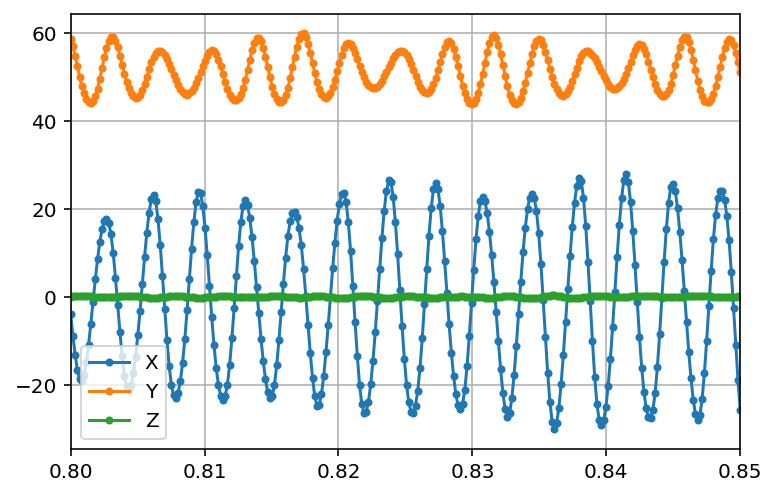

In [14]:
force_x = interp1d(data["Time"], data[f"Ma {column_mid_id} X-force"], kind='cubic')
force_y = interp1d(data["Time"], data[f"Ma {column_mid_id} Y-force"], kind='cubic')
force_z = interp1d(data["Time"], data[f"Ma {column_mid_id} Z-force"], kind='cubic')
forces = [force_x, force_y, force_z]
plt.xlim([0.8, 0.85])
plt.grid()
ts = np.linspace(0.8, 0.85, 300)
for i,c in enumerate(["X", "Y", "Z"]):
    plt.plot(ts, forces[i](ts), '.-', label=c)
plt.legend();

# Second-order Butterworth filtering
Maximum cutoff frequency:
    $$ \omega_c = \frac{V}{L}$$
where
    $V = \sqrt{\frac{E}{\rho}}$  and  $ L\approx 100\text{mm}$.


<table>
        <tr><th>Shape </th><th>Material </th><th> $E$ </th><th> $\nu$ </th><th>$\rho$ </th></tr>
        <tr><th>Sphere </th><td>Apple </td><td> 3e6 </td><td> 0.17 </td><td> 787 </td></tr>
        <tr><th>Prism </th><td>Potato </td><td> 2e6 </td><td> 0.45 </td><td> 630 </td></tr>
        <tr><th>Cylinder </th><td>Cucumber </td><td> 2.5e6 </td><td> 0.37 </td><td> 950 </td></tr>
</table>

E = 2000000.0


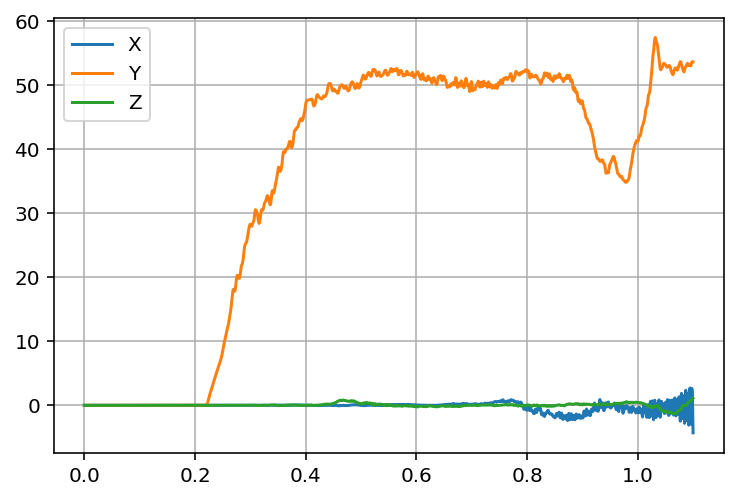

In [20]:
E_ = [3e6, 2e6, 2.5e6]
rho_ = [787., 630., 950.]
print("E =", E_[shape_id])

omega = np.sqrt(E_[shape_id]/rho_[shape_id])/100.
b, a = signal.butter(N=50, Wn=omega)

signals = []

plt.grid()
for i,c in enumerate(["X", "Y", "Z"]):
    filtered = signal.lfilter(b, a, data[f"Ma {column_mid_id} {c}-force"])
    plt.plot(data["Time"], filtered, label=c)
    signals.append(filtered)
plt.legend();

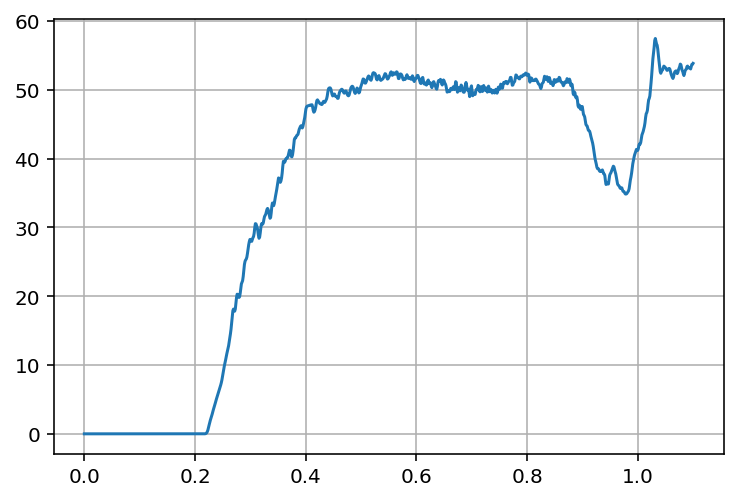

In [16]:
norms = np.linalg.norm(signals, axis=0)
plt.grid()
plt.plot(data["Time"], norms);

In [17]:
data["Time"].values[-1]

1.1000000238

In [18]:
dt = data["Time"].values[1:] - data["Time"].values[:-1]
np.mean(dt), np.std(dt)

(0.0011000000238, 6.42312350016305e-07)

In [4]:
import torch
t = torch.tensor(1)
print(t.shape)
print(t.size())
print(t.ndim)
print(t.numel())
print(t.stride())
print(t.element_size())
print(t.type())

torch.Size([])
torch.Size([])
0
1
()
8
torch.LongTensor


In [6]:
filez = np.load("ansys/ansys_ref_sphere.npz")
list(filez.keys())

['ref_trajectory', 'times', 'query_idxs']

In [7]:
filez["ref_trajectory"]

array([[[ 9.82528910e-03, -4.12674452e-18,  4.90444467e-02],
        [ 1.92266290e-02, -2.54787511e-18,  4.61958018e-02],
        [ 2.78895602e-02, -2.16840434e-19,  4.15639994e-02],
        ...,
        [-3.93920145e-03,  1.94996190e-02,  3.58622216e-03],
        [-5.34782721e-03,  2.57369966e-02, -2.15745359e-03],
        [-4.30481399e-03,  3.03559343e-02,  6.35170224e-03]],

       [[ 9.82529013e-03, -4.84389695e-09,  4.90444484e-02],
        [ 1.92266317e-02, -7.33507530e-09,  4.61958052e-02],
        [ 2.78895697e-02, -1.08585126e-08,  4.15640052e-02],
        ...,
        [-3.93922439e-03,  1.94980383e-02,  3.58624353e-03],
        [-5.34785071e-03,  2.57350838e-02, -2.15746852e-03],
        [-4.30481246e-03,  3.03538794e-02,  6.35170764e-03]],

       [[ 9.82529009e-03, -4.74815308e-09,  4.90444482e-02],
        [ 1.92266313e-02, -7.06894455e-09,  4.61958054e-02],
        [ 2.78895697e-02, -1.01867424e-08,  4.15640052e-02],
        ...,
        [-3.93922671e-03,  1.94980295e-02,